In [ ]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import pandas as pd
# Create a ticker object for the stock you want to fetch data for

data=pd.read_csv(r'/Apple_stock.csv')
data





,Date,Open,High,Low,Close,AdjClose,Volume
0,06-06-2016,724.909973,724.909973,714.609985,716.549988,716.549988,1565300
1,07-06-2016,719.840027,721.979980,716.549988,716.650024,716.650024,1336200
2,08-06-2016,723.960022,728.570007,720.580017,728.280029,728.280029,1583700
3,09-06-2016,722.869995,729.539978,722.335999,728.580017,728.580017,988900
4,10-06-2016,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
...,...,...,...,...,...,...,...
1253,27-05-2021,2436.939941,2440.000000,2402.000000,2402.510010,2402.510010,1948100
1254,28-05-2021,2421.959961,2428.139893,2407.689941,2411.560059,2411.560059,1205400
1255,01-06-2021,2422.000000,2437.970947,2404.879883,2429.810059,2429.810059,958300
1256,02-06-2021,2435.310059,2442.000000,2404.199951,2421.280029,2421.280029,857900


In [ ]:
# Additional Exploratory data analysis
# Group by year and calculate the mean closing price
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Year'] = data['Date'].dt.year
mean_closing_price = data.groupby('Year')['Close'].mean()

# Pivot the data to get the average closing price for each year and month
data['Month'] = data['Date'].dt.month_name()
pivot_table = data.pivot_table(values='Close', index='Year', columns='Month', aggfunc='mean').fillna(0)

# Melt the pivoted table to convert it back to a long format
melted_data = pivot_table.reset_index().melt(id_vars='Year', var_name='Month', value_name='Average Close')

# Calculate the mean and standard deviation of the closing price
mean_close = data['Close'].mean()
std_close = data['Close'].std()

# Print the results
print("Mean closing price:", mean_close)
print("Standard deviation of closing price:", std_close)
print("Mean closing price by year:")
print(mean_closing_price)
print("Pivoted table:")
print(pivot_table)
print("Melted table:")
print(melted_data)





Mean closing price: 1207.891472992051
Standard deviation of closing price: 374.5950640196912
Mean closing price by year:
Year
2016     760.561369
2017     921.780837
2018    1113.225134
2019    1188.393057
2020    1481.403811
2021    2127.893330
Name: Close, dtype: float64
Pivoted table:
Month        April       August     December     February      January  \
Year                                                                     
2016      0.000000   775.793476   782.171422     0.000000     0.000000   
2017    844.056840   922.023045  1043.653003   816.916581   807.904752   
2018   1035.696187  1225.671732  1037.420519  1088.206839  1130.770467   
2019   1226.226190  1180.686812  1340.867635  1114.242123  1072.264279   
2020   1234.140480  1545.944749  1772.278182  1464.110518  1436.653797   
2021   2289.842367     0.000000     0.000000  2068.356824  1808.383693   

Month         July         June        March          May     November  \
Year                                        

In [ ]:
data.shape

(1258, 9)

In [ ]:

# Generate new data or perform any data transformations as needed
data['NewColumn'] = data['Close'] * 2

print(data)


           Date         Open         High          Low        Close  \
0    2016-06-06   724.909973   724.909973   714.609985   716.549988   
1    2016-06-07   719.840027   721.979980   716.549988   716.650024   
2    2016-06-08   723.960022   728.570007   720.580017   728.280029   
3    2016-06-09   722.869995   729.539978   722.335999   728.580017   
4    2016-06-10   719.469971   725.890015   716.429993   719.409973   
...         ...          ...          ...          ...          ...   
1253 2021-05-27  2436.939941  2440.000000  2402.000000  2402.510010   
1254 2021-05-28  2421.959961  2428.139893  2407.689941  2411.560059   
1255 2021-06-01  2422.000000  2437.970947  2404.879883  2429.810059   
1256 2021-06-02  2435.310059  2442.000000  2404.199951  2421.280029   
1257 2021-06-03  2395.020020  2409.745117  2382.830078  2404.610107   

         AdjClose   Volume  Year Month    NewColumn  
0      716.549988  1565300  2016  June  1433.099976  
1      716.650024  1336200  2016  June 

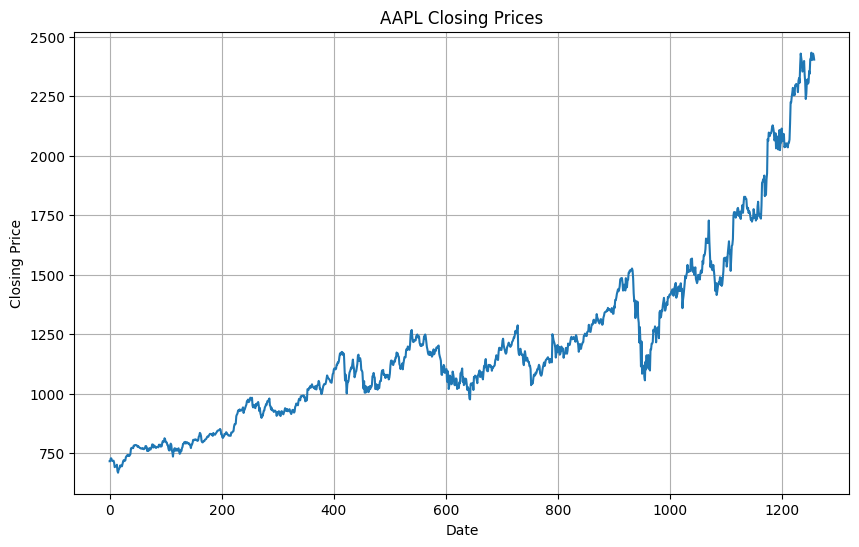

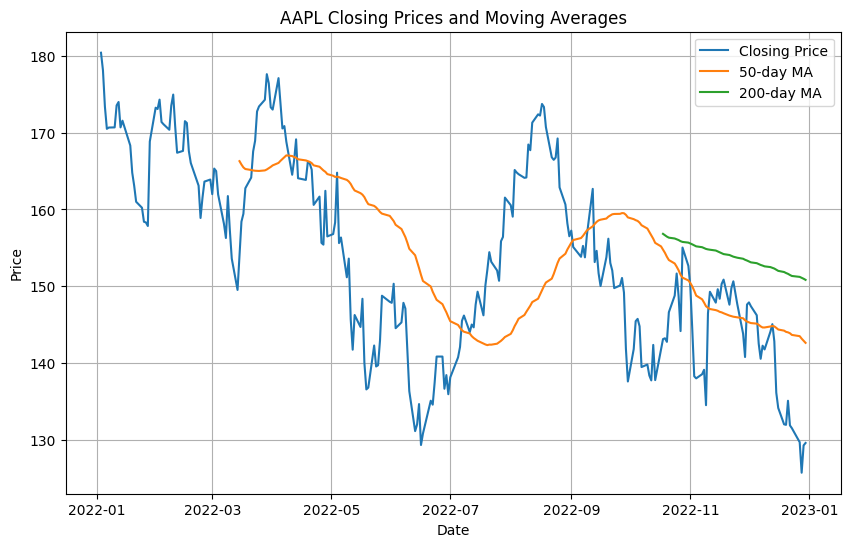

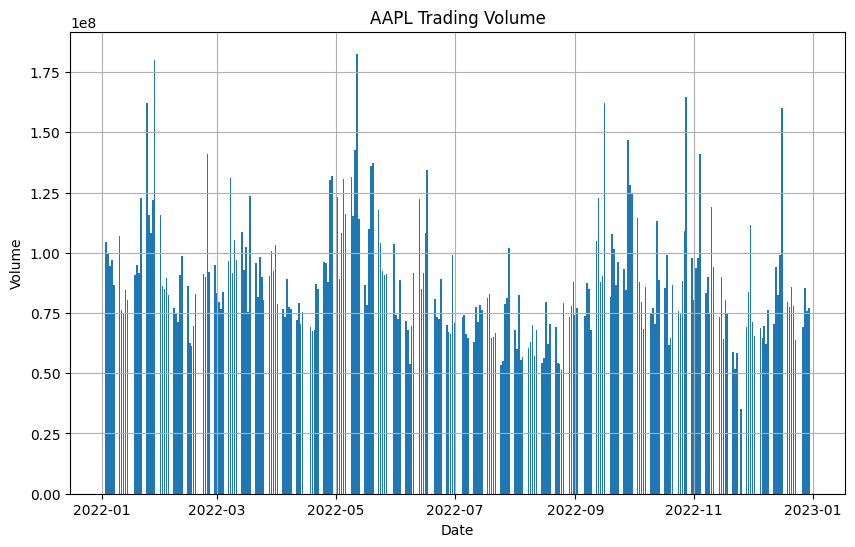

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Closing Prices')
plt.grid(True)
plt.show()
# This code fetches the historical data for Apple (AAPL) for a specific date range and then plots the closing prices over time.

# Plotting Moving Averages:
# python


# Fetch historical data
ticker = yf.Ticker("AAPL")
data = ticker.history(period="1d", start="2022-01-01", end="2022-12-31")

# Calculate 50-day and 200-day moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plot the closing prices and moving averages
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.plot(data.index, data['MA50'], label='50-day MA')
plt.plot(data.index, data['MA200'], label='200-day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Closing Prices and Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

# Fetch historical data
ticker = yf.Ticker("AAPL")
data = ticker.history(period="1d", start="2022-01-01", end="2022-12-31")

# Plot the volume
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('AAPL Trading Volume')
plt.grid(True)





<!-- The hypothesis is that there is a correlation between a company's earnings per share
(EPS) and its stock price. This hypothesis aims to investigate the relationship between a
company's profitability, as reflected in its earnings, and its stock valuati -->on



In [ ]:
# Loaded datasets for further analysis
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

data_file=pd.read_csv(r'/Apple_stock.csv')
print(data_file)


            Date         Open         High          Low        Close  \
0     06-06-2016   724.909973   724.909973   714.609985   716.549988   
1     07-06-2016   719.840027   721.979980   716.549988   716.650024   
2     08-06-2016   723.960022   728.570007   720.580017   728.280029   
3     09-06-2016   722.869995   729.539978   722.335999   728.580017   
4     10-06-2016   719.469971   725.890015   716.429993   719.409973   
...          ...          ...          ...          ...          ...   
1253  27-05-2021  2436.939941  2440.000000  2402.000000  2402.510010   
1254  28-05-2021  2421.959961  2428.139893  2407.689941  2411.560059   
1255  01-06-2021  2422.000000  2437.970947  2404.879883  2429.810059   
1256  02-06-2021  2435.310059  2442.000000  2404.199951  2421.280029   
1257  03-06-2021  2395.020020  2409.745117  2382.830078  2404.610107   

         AdjClose   Volume  
0      716.549988  1565300  
1      716.650024  1336200  
2      728.280029  1583700  
3      728.580017  

[]

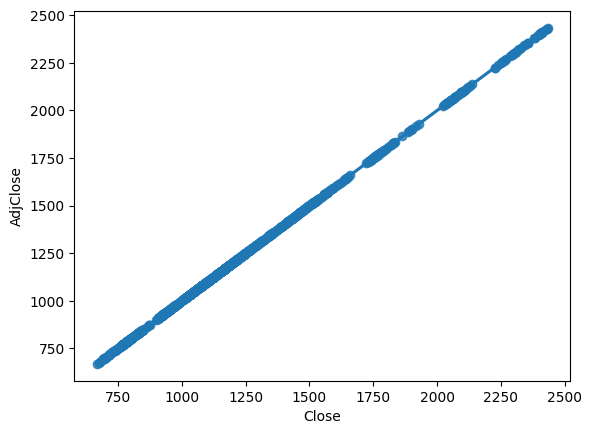

In [ ]:
#@title Regression line  to explain variability in dependent variable

import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=data_file.Close,y=data_file.AdjClose)
plt.plot()

#as the best fit line has a positive slope graph it depicts that the values are positively correlated

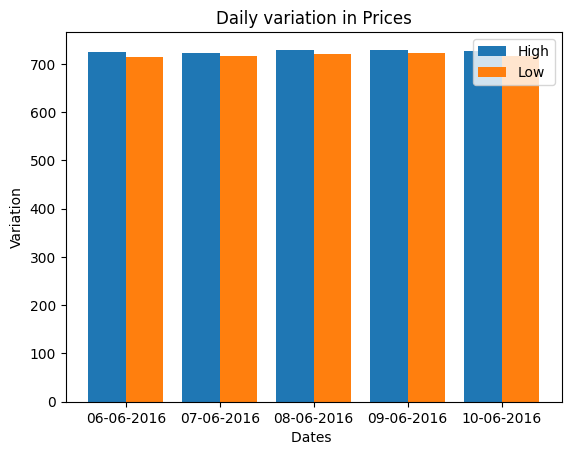

In [ ]:
#@title Bar plot to compare the high and low values of the first 5 dates

from matplotlib.axis import YAxis
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

X = data_file['Date'].head()
Y = data_file['High'].head()
Z = data_file['Low'].head()

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, Y, 0.4, label = 'High')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Low')

plt.xticks(X_axis, X)
plt.xlabel("Dates ")
plt.ylabel("Variation")
plt.title("Daily variation in Prices")
plt.legend()
plt.show()

In [ ]:
#@title Performing t-test on open and close values

from scipy import stats
#null hypothesis-There is no significance difference in the values of open and close

a=data['Open']
b=data['Close']
t2=stats.ttest_ind(a,b)
t2
#pvalue is more than 0.05 we accept the null hypothesis
#as statistics value is negative and larger that means there is no significant difference in values


Ttest_indResult(statistic=-0.028019510277437636, pvalue=0.9776577700526637)

In [ ]:
#@title Karl-pearson correlation model

import scipy
from scipy.stats.stats import pearsonr
a=data_file['AdjClose']
b=data_file['Volume']
pearsonr_coefficient,p_value=pearsonr(a,b)
print('Pearson Correlation coefficient %0.3f'%(pearsonr_coefficient))

#as correlation value is negative we can say that if one increases the other decreases

Pearson Correlation coefficient -0.020


<ipython-input-16-39c04aa39863>:4: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


<ipython-input-17-81153eb589e4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  seaborn.heatmap(data_file.corr(),annot=True,cmap="coolwarm")


<Axes: >

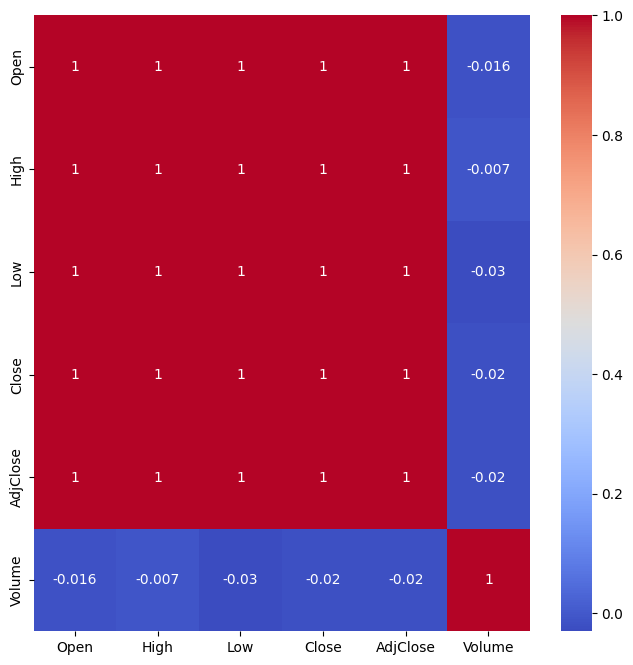

In [ ]:
import seaborn
plt.figure(figsize=(8,8))
seaborn.heatmap(data_file.corr(),annot=True,cmap="coolwarm")

#red depicts strong positive correlation
#blue depicts strong negative correlation

In [ ]:
#@title Logistic regression method
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
data_file1=pd.read_excel(r'/content/Apple_stock.csv')


features = data_file1[['High','Open','Close','Volume','Low', 'AdjClose']]
target = data_file1['Operation']
labels = data_file1['Operation']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)
from sklearn.linear_model import LogisticRegression
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []
#used for prediction and classification of problems
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)



In [ ]:
#@title Momentum Hypothesis
# The hypothesis is that there is a momentum effect in the Apple stock,
# where stocks that have exhibited positive returns in the recent past will continue to outperform in the near future.
# This hypothesis investigates the presence of short-term price momentum as a predictor of future stock returns

import pandas as pd
import numpy as np
import yfinance as yf
from scipy.stats import ttest_ind


ticker = 'AAPL'  # Ticker symbol for Apple stock
start_date = '2022-01-01'  # Start date for historical data
end_date = '2022-12-31'  # End date for historical data


data = yf.download(ticker, start=start_date, end=end_date)

# Calculation of Returns
data['Returns'] = data['Adj Close'].pct_change()

# Momentum Calculation
n = 10  # Number of days for momentum calculation MOM(10) is generally considered for backtesting
data['Momentum'] = data['Adj Close'].diff(n)

# Portfolio or group for Momentum rankings from high to low momentum Formation
data['MomentumRank'] = data['Momentum'].rank(ascending=False)
n_portfolios = 5  # Number of portfolios
data['Portfolio'] = pd.qcut(data['MomentumRank'], n_portfolios, labels=False)

# Performance Analysis
holding_period = 20  # Number of days for the holding period
data['PortfolioReturns'] = data.groupby('Portfolio')['Returns'].shift(-holding_period)
portfolio_returns = data.groupby('Portfolio')['PortfolioReturns'].mean()

# Statistical Analysis (T-Test)
portfolio_high_momentum = data[data['Portfolio'] == 0]['PortfolioReturns'].dropna()
portfolio_low_momentum = data[data['Portfolio'] == n_portfolios-1]['PortfolioReturns'].dropna()

# Check if both portfolios have valid returns
if portfolio_high_momentum.notnull().any() and portfolio_low_momentum.notnull().any():
    if portfolio_high_momentum.std() > 0 and portfolio_low_momentum.std() > 0:
        t_stat, p_value = ttest_ind(portfolio_high_momentum, portfolio_low_momentum)
        print(f"T-Statistic: {t_stat}")
        print(f"P-value: {p_value}")
    else:
        print("Insufficient variability between portfolios for t-test")
else:
    print("Insufficient data to perform t-test")


[*********************100%***********************]  1 of 1 completed
T-Statistic: 2.976332627470884
P-value: 0.0043295489576288485


The obtained t-statistic is approximately 2.976 and the p-value is approximately 0.004. This suggests that there is strong evidence to reject the null hypothesis, indicating a significant difference in mean returns between the high momentum and low momentum portfolios.